# re-mapping analysis of outbreak sample "22_japan"

### *Primary mapping* of reads against reference US nashville strain and generation of consensus + variant call was done previously in another notebook using the same method described here. This notebook describes the secondary analysis wherein mapping against of reads was done against the outbreak consensu sequence, "cons_GI.2_outbreak2013k4.fa"

In [1]:
import os
os.chdir("/media/viro102/HD-ADU3/kte-data/sapo-ivar/test/outbreak_samples/GI.2/remapped-share/2013k4.fa/22_japan")

In [2]:
ls

22_japan_GI.2.bad_are_masked.bam*
22_japan_GI.2.bad_are_masked.sorted.bam*
22_japan_GI.2.consensus.amb*
22_japan_GI.2.consensus.ann*
22_japan_GI.2.consensus.bwt*
22_japan_GI.2.consensus.fa*
22_japan_GI.2.consensus.fa.fai*
22_japan_GI.2.consensus.pac*
22_japan_GI.2.consensus.qual.txt*
22_japan_GI.2.consensus.sa*
22_japan_GI.2_final_old.tsv*
22_japan_GI.2_primers.bed*
22_japan_GI.2_primers_consensus_1.tsv*
22_japan_GI.2_primers_consensus.bam*
22_japan_GI.2_primers_consensus.bam.bed*
22_japan_GI.2.sorted.bam*
22_japan_GI.2.sorted.bam.bai*
22_japan_GI.2.trimmed.bam*
22_japan_GI.2.trimmed.sorted.bam*
22_japan_GI.2.trimmed.sorted.bam.bai*
22_S5_L001_R1_001.fastq.gz*
22_S5_L001_R2_001.fastq.gz*
cons_clean_GI.2_outbreak2013k4.gff*
cons_GI.2_outbreak2013k4.fa*
cons_GI.2_outbreak2013k4.gff*
depth/
Primalprimers_SaV_GI.2_batch2_ok.fa*
Primalprimers_SaV_GI.2_batch2_ok.fa.bam*
Primal-primers_SaVGI.2pairs_ok.tsv*
primer_mismatchers_indices.txt*
script-ivar-22_japan.sh*


In [3]:
%%bash
bwa index cons_GI.2_outbreak2013k4.fa
echo "reference indexed"

reference indexed


[bwa_index] Pack FASTA... 0.00 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 0.00 seconds elapse.
[bwa_index] Update BWT... 0.00 sec
[bwa_index] Pack forward-only FASTA... 0.00 sec
[bwa_index] Construct SA from BWT and Occ... 0.00 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index cons_GI.2_outbreak2013k4.fa
[main] Real time: 0.523 sec; CPU: 0.009 sec


map reads to reference

In [4]:
%%bash
# map reads to reference
bwa mem -t 32  cons_GI.2_outbreak2013k4.fa  *R1_001.fastq.gz *R2_001.fastq.gz | samtools view -b -F 4 -F 2048 | samtools sort -o 22_japan_GI.2_a.sorted.bam ; samtools index 22_japan_GI.2_a.sorted.bam
tput setaf 1 echo "mapping completed"

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 2333598 sequences (320000052 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (38, 1124617, 39, 36)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (304, 1119, 2680)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 7432)
[M::mem_pestat] mean and std.dev: (1639.71, 1606.75)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 9808)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (81, 125, 188)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 402)
[M::mem_pestat] mean and std.dev: (140.17, 77.77)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 509)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (46, 1059, 2696)
[M::mem_pestat] low a

Let's now trim off the primer sequences using ivar. In order to do this we need three files.BED file with primer coordinates. We will generate this by aligning the primer sequences to the reference sequence and then using bedtools to create the BED file. Aligned and sorted BAM file generate in the previous step.

In [5]:
%%bash
bwa mem -k 5 -T 16 cons_GI.2_outbreak2013k4.fa Primalprimers_SaV_GI.2_batch2_ok.fa  | samtools view -b -F 4 > Primalprimers_SaV_GI.2_batch2_ok.fa.bam

bedtools bamtobed -i Primalprimers_SaV_GI.2_batch2_ok.fa.bam > 22_japan_GI.2_primers.bed

tput setaf 1 echo "bed file with primers locations on ref generated"

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 68 sequences (1514 bp)...
[M::mem_process_seqs] Processed 68 reads in 0.010 CPU sec, 0.010 real sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa mem -k 5 -T 16 cons_GI.2_outbreak2013k4.fa Primalprimers_SaV_GI.2_batch2_ok.fa
[main] Real time: 0.038 sec; CPU: 0.014 sec


We will now use BED file into ivar to trim primer sequences
Note that this BED file has to be generated only once per reference sequence.

In [6]:
%%bash
ivar trim -b 22_japan_GI.2_primers.bed -p 22_japan_GI.2.trimmed -i 22_japan_GI.2_a.sorted.bam

tput setaf 1 echo "primers trimming complete"

Found 64 primers in BED file
Amplicons detected: 

Number of references in file: 1
cons_GI.2_outbreak2013k4
Using Region: cons_GI.2_outbreak2013k4

Found 2722406 mapped reads
Found 0 unmapped reads
Sorted By Coordinate
-------
Processed 10% reads ... 
Processed 20% reads ... 
Processed 30% reads ... 
Processed 40% reads ... 
Processed 50% reads ... 
Processed 60% reads ... 
Processed 70% reads ... 
Processed 80% reads ... 
Processed 90% reads ... 
Processed 100% reads ... 

-------
Results: 
Primer Name	Read Count
KTESAVG12_1_LEFT	345
KTESAVG12_1_RIGHT	2418
KTESAVG12_2_LEFT	3904
KTESAVG12_2_RIGHT	3220
KTESAVG12_3_LEFT	3648
KTESAVG12_3_RIGHT	5607
KTESAVG12_4_LEFT	5409
KTESAVG12_4_RIGHT	7214
KTESAVG12_5_LEFT	5807
KTESAVG12_5_RIGHT	3876
KTESAVG12_6_LEFT	2364
KTESAVG12_7_LEFT	6233
KTESAVG12_7_RIGHT	10864
KTESAVG12_8_LEFT	14374
KTESAVG12_8_RIGHT	10106
KTESAVG12_9_LEFT	5202
KTESAVG12_9_RIGHT	5772
KTESAVG12_10_LEFT	12609
KTESAVG12_10_RIGHT	11088
KTESAVG12_11_LEFT	8107
KTESAVG12_11_RIGHT	9084


let us sort and index trimmed BAM file.


In [7]:
%%bash
samtools sort -o 22_japan_GI.2.trimmed.sorted.bam 22_japan_GI.2.trimmed.bam ; samtools index 22_japan_GI.2.trimmed.sorted.bam
tput setaf 1 echo "Sorted and indexed trimmed BAM file"

In [8]:
#Let's quicky take a look at the depth of the trimmed vs untrimmed BAM file. We'll extract the depth using the samtools depth command.


In [9]:
%%bash
mkdir depth
samtools depth -a 22_japan_GI.2.trimmed.sorted.bam > depth/22_japan_GI.2.trimmed.sorted.bam.depth ; samtools depth -a 22_japan_GI.2_a.sorted.bam > depth/22_japan_GI.2.sorted.bam.depth
tput setaf 1 echo "please plot the depth per position"


mkdir: cannot create directory ‘depth’: File exists


In [10]:
import os
os.chdir("/media/viro102/HD-ADU3/kte-data/sapo-ivar/test/outbreak_samples/GI.2/remapped-share/2013k4.fa/22_japan/depth")

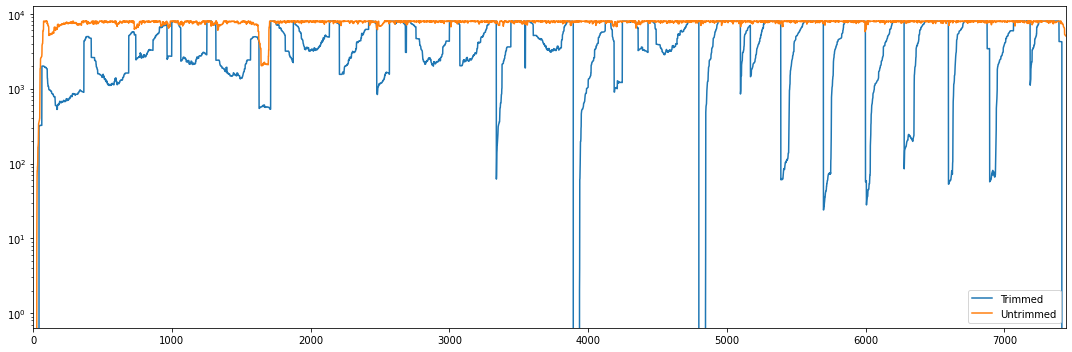

In [11]:

import pandas as pd 
import matplotlib.pyplot as plt
df_trimmed = pd.read_csv("22_japan_GI.2.trimmed.sorted.bam.depth", sep = "\t", names = ["Ref", "Pos","depth_tr"])
df_untrimmed = pd.read_csv("22_japan_GI.2.sorted.bam.depth", sep = "\t", names = ["Ref", "Pos","depth_untr"])
ax = df_trimmed["depth_tr"].plot(logy=True, label = "Trimmed", figsize = (15,5))
df_untrimmed["depth_untr"].plot(logy=True, ax = ax, label ="Untrimmed")
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
os.chdir("/media/viro102/HD-ADU3/kte-data/sapo-ivar/test/outbreak_samples/GI.2/remapped-share/2013k4.fa/22_japan/")

Now, we need to identify primer sequences that might have a mismatch with the consensus sequence to ensure that we remove reads from any amplicon that might bias the iSNV frequency due to varying primer binding effeciency"
To do this, we should : 
-Call consensus on merged BAM file.
-align primer sequences to consensus after creating a bwa index from the consensus sequence called.

In [13]:
%%bash

samtools mpileup -A -d 0 -Q 0 22_japan_GI.2.trimmed.sorted.bam  | ivar consensus -p 22_japan_GI.2.consensus
echo "consensus called on merged BAM file."
bwa index -p 22_japan_GI.2.consensus 22_japan_GI.2.consensus.fa
bwa mem -k 5 -T 16 22_japan_GI.2.consensus Primalprimers_SaV_GI.2_batch2_ok.fa  | samtools view -bS -F 4 | samtools sort -o 22_japan_GI.2_primers_consensus.bam

tput setaf 1 echo "primers mapped to consensus"

Minimum Quality: 20
Threshold: 0
Minimum depth: 10
Regions with depth less than minimum depth covered by: N
Reference length: 7283
Positions with 0 depth: 0
Positions with depth below 10: 6
consensus called on merged BAM file.


[mpileup] 1 samples in 1 input files
[mpileup] Max depth set to maximum value (2147483647)
[bwa_index] Pack FASTA... 0.00 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 0.00 seconds elapse.
[bwa_index] Update BWT... 0.00 sec
[bwa_index] Pack forward-only FASTA... 0.00 sec
[bwa_index] Construct SA from BWT and Occ... 0.00 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index -p 22_japan_GI.2.consensus 22_japan_GI.2.consensus.fa
[main] Real time: 0.485 sec; CPU: 0.009 sec
[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 68 sequences (1514 bp)...
[M::mem_process_seqs] Processed 68 reads in 0.011 CPU sec, 0.011 real sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa mem -k 5 -T 16 22_japan_GI.2.consensus Primalprimers_SaV_GI.2_batch2_ok.fa
[main] Real time: 0.013 sec; CPU: 0.014 sec


Let's now call iSNVs on this BAM file at a minimum threshold of 3% and the default minimum quality threshold of 20

In [14]:
%%bash
samtools mpileup -A -d 0 --reference 22_japan_GI.2.consensus.fa -Q 0 22_japan_GI.2_primers_consensus.bam | ivar variants -p 22_japan_GI.2_primers_consensus_1 -t 0.03


A GFF file containing the open reading frames (ORFs) has not been provided. Amino acid translation will not be done.
A reference sequence has not been supplied. Amino acid translation will not be done.


[mpileup] 1 samples in 1 input files
[mpileup] Max depth set to maximum value (2147483647)
[E::fai_retrieve] Failed to retrieve block: unexpected end of file
[E::fai_retrieve] Failed to retrieve block: unexpected end of file
[E::fai_retrieve] Failed to retrieve block: unexpected end of file
[E::fai_retrieve] Failed to retrieve block: unexpected end of file
[E::fai_retrieve] Failed to retrieve block: unexpected end of file
[E::fai_retrieve] Failed to retrieve block: unexpected end of file
[E::fai_retrieve] Failed to retrieve block: unexpected end of file
[E::fai_retrieve] Failed to retrieve block: unexpected end of file
[E::fai_retrieve] Failed to retrieve block: unexpected end of file
[E::fai_retrieve] Failed to retrieve block: unexpected end of file
[E::fai_retrieve] Failed to retrieve block: unexpected end of file
[E::fai_retrieve] Failed to retrieve block: unexpected end of file
[E::fai_retrieve] Failed to retrieve block: unexpected end of file
[E::fai_retrieve] Failed to retrieve b

Echo "Let's now get the indices of primers with mismtaches and their respective pairs. To get the pair information, we need a tsv file with two columns to represent the pairs of primers. This file is in pair_information.tsv"

In [15]:
%%bash
bedtools bamtobed -i 22_japan_GI.2_primers_consensus.bam > 22_japan_GI.2_primers_consensus.bam.bed ; ivar getmasked -i 22_japan_GI.2_primers_consensus_1.tsv -b 22_japan_GI.2_primers_consensus.bam.bed -f Primal-primers_SaVGI.2pairs_ok.tsv -p primer_mismatchers_indices


tput setaf 1 echo "you got the indices of primers with mismtaches and their respective pairs"

Found 60 primers in BED file
Primer pair for KTESAVG12_2_LEFT not found in BED file.
Primer pair for KTESAVG12_3_LEFT not found in BED file.
Primer pair for KTESAVG12_4_LEFT not found in BED file.
Primer pair for KTESAVG12_5_LEFT not found in BED file.
Primer pair for KTESAVG12_6_LEFT not found in BED file.
Primer pair for KTESAVG12_7_LEFT not found in BED file.
Primer pair for KTESAVG12_8_LEFT not found in BED file.
Primer pair for KTESAVG12_9_LEFT not found in BED file.
Primer pair for KTESAVG12_11_RIGHT not found in BED file.
Primer pair for KTESAVG12_12_RIGHT not found in BED file.
Primer pair for KTESAVG12_14_RIGHT not found in BED file.
Primer pair for KTESAVG12_15_RIGHT not found in BED file.
Primer pair for KTESAVG12_17_RIGHT not found in BED file.
Primer pair for KTESAVG12_18_RIGHT not found in BED file.
Primer pair for KTESAVG12_19_RIGHT not found in BED file.
Primer pair for KTESAVG12_20_RIGHT not found in BED file.
Primer pair for KTESAVG12_21_RIGHT not found in BED file.
P

let us remove reads from mismatched primers(Masking). Those reads are associated with false iSNPs. After that, let us compute depth in masked and unmasked files

In [ ]:
%%bash

ivar removereads -i 22_japan_GI.2.trimmed.sorted.bam -p 22_japan_GI.2.bad_are_masked.bam -t primer_mismatchers_indices.txt -b 22_japan_GI.2_primers.bed

tput setaf 1 echo "you removed reads from mismatched primers"
samtools sort -o 22_japan_GI.2.bad_are_masked.sorted.bam 22_japan_GI.2.bad_are_masked.bam 
samtools depth -a 22_japan_GI.2.bad_are_masked.sorted.bam > depth/22_japan_GI.2.bad_are_masked.sorted.depth

Let us now plot depth for the masked and unmasked samples

In [ ]:
import os
os.chdir("/media/viro102/HD-ADU3/kte-data/sapo-ivar/test/outbreak_samples/GI.2/remapped-share/2013k4.fa/22_japan/depth/")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df_unmasked = pd.read_csv("22_japan_GI.2.trimmed.sorted.bam.depth", sep = "\t", names = ["Ref", "Pos", "depth_unmask"])
df_masked = pd.read_csv("22_japan_GI.2.bad_are_masked.sorted.depth", sep = "\t", names = ["Ref", "Pos", "depth_mask"])

ax = df_masked["depth_mask"].plot(logy=True, label = "Masked", figsize = (15,5), alpha = 0.9)
df_unmasked["depth_unmask"].plot(logy=True, ax = ax, label ="Unmasked", alpha=0.9)
plt.legend()
plt.grid()
plt.show()

Let's now call iSNVs from the BAMS without reads from the masked amplicons as well as the amino acid consequence of each mutation

In [ ]:
os.chdir("/media/viro102/HD-ADU3/kte-data/sapo-ivar/test/outbreak_samples/GI.2/remapped-share/2013k4.fa/22_japan/")

In [ ]:
%%bash
gt gff3validator cons_clean_GI.2_outbreak2013k4.gff
# to validate the gff file

In [ ]:
%%bash
samtools mpileup -A -d 0 --reference cons_GI.2_outbreak2013k4.fa -Q 0 22_japan_GI.2.bad_are_masked.sorted.bam | ivar variants -p 22_japan_GI.2_final -t 0.03 -r cons_GI.2_outbreak2013k4.fa -g cons_clean_GI.2_outbreak2013k4.gff ; tput setaf 1 echo "analysis is completed"
tput setaf 1 echo "please exclude variants with depth <400 and count iSNV"

show position of called variants

In [ ]:
import os
os.chdir("/media/viro102/HD-ADU3/kte-data/sapo-ivar/test/outbreak_samples/GI.2/remapped-share/2013k4.fa/22_japan/")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
rep_a = pd.read_csv("22_japan_GI.2_final.tsv", sep="\t")
rep_a["AA_csq"] = np.where(rep_a["REF_AA"] == rep_a["ALT_AA"], "Synonymous", "Non-Synonymous")
rep_a.head()

In [ ]:
rep_b = rep_a[rep_a['TOTAL_DP'] >= 400]
rep_b

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
rep_b=rep_a[rep_a['TOTAL_DP'] >= 400]
sns.lmplot( x="POS", y="ALT_FREQ", data=rep_b, fit_reg=False, hue='AA_csq',aspect=20/8, 
           legend=True, legend_out=True)
plt.xlabel('Genome position', fontsize=15)
plt.ylabel('iSNV frequency', fontsize=15)
plt.title('iSNVs in sample 22_japan', fontsize=20)
plt.grid(axis="both")
plt.show()

In [ ]:
# let us filter snps in non structural region [1-5099]
print("snps in non structural region")
print((rep_b[(rep_b['POS'] > 3610) & (rep_b['POS'] < 5099)]).shape)
# let us filter snps in complete capsid[5010-6800]
print("snps in capsid")
print((rep_b[(rep_b['POS'] > 5100) & (rep_b['POS'] < 7350)]).shape)

In [ ]:
# what percentage of this masked genome (without reads from mismached primers) has depth >400 ? 
os.chdir("/media/viro102/HD-ADU3/kte-data/sapo-ivar/test/outbreak_samples/GI.2/remapped-share/2013k4.fa/22_japan/depth")
df_masked = pd.read_csv("22_japan_GI.2.bad_are_masked.sorted.depth", sep = "\t", names = ["Ref", "Pos", "depth_mask"])
df_masked['400cov'] = np.where(df_masked['depth_mask']>=400, 'yes', 'no')
df_masked['100cov'] = np.where(df_masked['depth_mask']>=100, 'yes', 'no')
df_masked.head()

In [ ]:
# What proportion of the genome is has a depth of coverage of at least >100 reads, >400 (Breadth ofcoverage)
my_tab1 = pd.crosstab(index=df_masked["100cov"],  # Make a crosstab
                              columns="Breadth 100coverage")      # Name the count column
my_tab2 = pd.crosstab(index=df_masked["400cov"],  # Make a crosstab
                              columns="Beadth above 400coverage")      # Name the count column
shape=df_masked.shape
print(shape)
print(my_tab1); print(my_tab2)

In [ ]:
7232/7442 * 100 # proportion of genome covered >400

In [ ]:
7314/7442 * 100 # proportion of genome covered >100